# AppStream Image Builder Guide



Step One: Select Base Image to start from 

- AppStream provides some base images to start off, with two os options: Windows and Amazon Linux 2 
- You may also start from images created by others (or yourself) where certain apps are already installed, such as 

Once you've started working with AppStream, you would have created some images with certain apps that you chose to install. You may choose to start from those images if you would like your new image to contain the same apps, but don't want to install them all over again. This is the advantage of AppStream, as you can build on old images to make new ones. 

Step Two: Launch Image Builder 



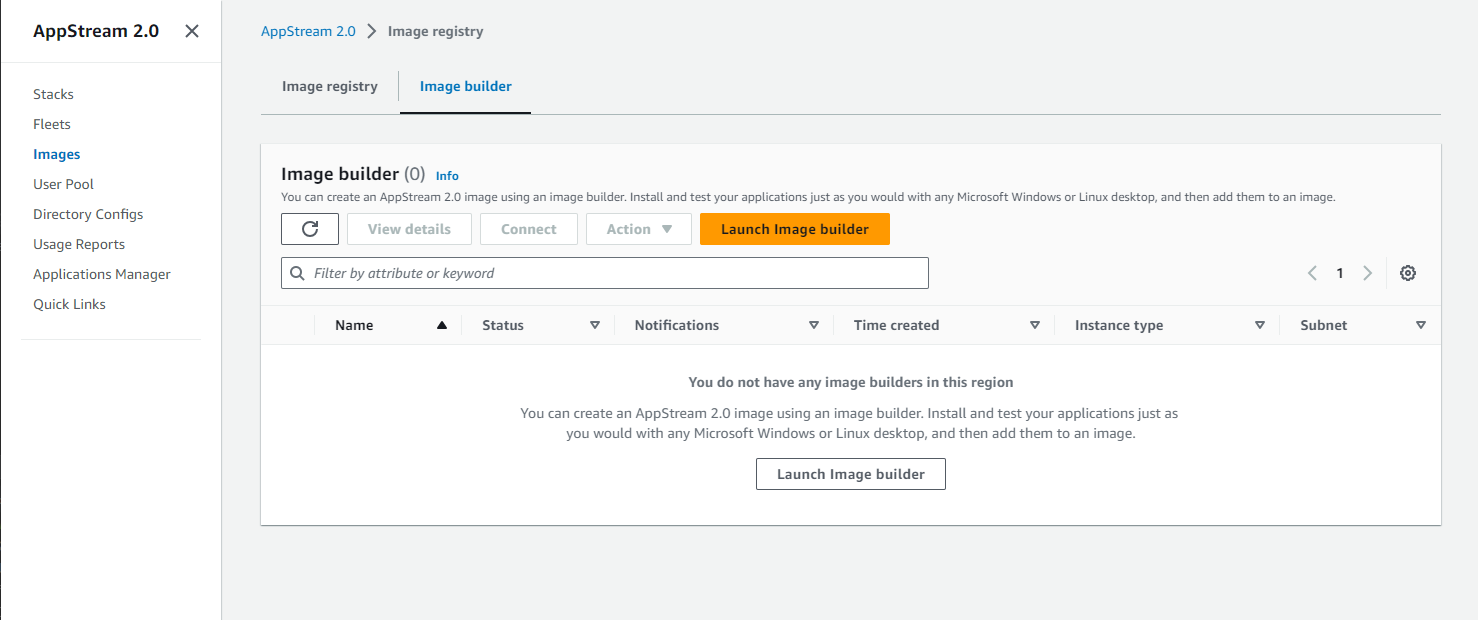

- Choose the base image 
- (Optional) Attach IAM role: If you would like to have access to other AWS services (like S3), attach an IAM role with the corresponding permissions. Then within the image builder, you can access those services with the profile name “appstream-machine-role" 
- Choose default network configuration 



 
Step Three: Install Application as Admin 

- If Windows, select the Administrator User. If Linux, you are logged in as Admin by default. 
- Install desired applications (such as SLEAP) as you usually would  
- Reminder to install any packages / files in the root directory for Linux or disk C for Windows, but NEVER in any user directory.  
- To allow access to s3, install Rclone if not already installed (when building image from Appstream base image) 

Step Four: Add Application as Admin 

- In Image Assistant app, click “Add App” and start adding applications you would like to stream to users.  

- For typical desktop apps like Chrome and GitBash, you could select the executable file where you installed it, and the configurations would be autocompleted. For packages like Sleap and DeepLabCut that would be run from the terminal, you could select the Terminal App.  

- (Optional) Add path to icon if not autocompleted.  

- (Optional) For Windows, add launch parameters and the working directory for commands that would be run at the beginning whenever a user launches the app (such as activating a Conda environment) 

Step Four: Create default settings as Template User 

- Switch to Template User and configure the default settings, such as setting a default Conda environment. Default settings that you can create and configure include:
    - Application preferences, including a browser home page, toolbar customizations, and security settings. 
    - Application data settings, including browser bookmarks and connection profiles. 
    - Windows experience settings, including displaying file name extensions and hidden folders. 

As a result of this step, users who launch instances from the resulting image won't need to configure these settings themselves and can get started with the applications quickly. 


Step Five: Copy default settings to Admin 

- In Windows Images, just click the “save settings” button in the Image Assistant app after switching back to an Admin 
- In Linux Images, follow instructions in [notebook]().  

Step Five: (Optional) Test Apps 

- Switch to Test User and open the apps, check that everything works and the default settings are configured correctly 

Step Six: Optimize App Launch 

- In Image Assistant app under the Optimize tab, click “Launch” and the Image Assistant app will start launching the registered apps one by one 
- After each app starts, provide any required input and perform the first run experience for the app (e.g. launch the Sleap GUI once in the terminal). Then click “continue” to proceed to the next app. 

This is an automated process to perform optimizations to reduce the time that it takes for the application to launch for the first time on a new fleet instance. Upon each app launch, Image Assistant will automatically detect the files that should be optimized. This is a simple process if you are using the Image Assistant for this step. (If using AWS CLI, you would have to specify which files to optimize for.)

Step Seven: Create Image 
 
- Complete the details for the resulting image (e.g. name, description), then click `Disconnect and Create Image`. 
    - For description, you can describe the apps included and their versions. 
- The session will disconnect and may prompt you to retry the connection, but you are safe to close the browser tab now. The image is being created and the image builder stats will appear as “Snapshotting” in the AWS console. Once the snapshot is complete, the image builder will be “Stopped”, and the demo image you created will be in the Image Register, ready for use. 

 